In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
%matplotlib inline

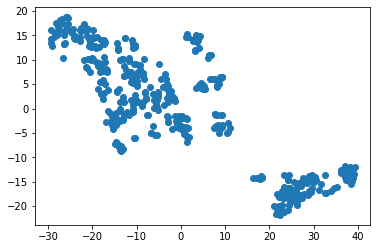

In [3]:
# Задание 1
boston = load_boston()
#print(boston.keys())

data = boston["data"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
Y = pd.DataFrame(target, columns=["price"])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=150, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


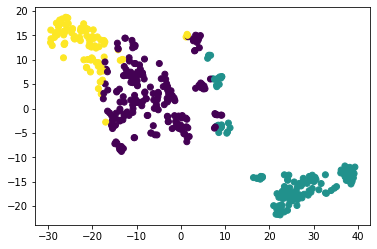

              CRIM         TAX
              mean        mean
cluster                       
0         0.421660  302.931937
1        10.797028  621.842520
2         0.073566  306.918605
             price
              mean
cluster           
0        24.958115
1        16.165354
2        27.788372


In [81]:
# Задание 2
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train_scaled)
##print(train_labels)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

df_train_labels = pd.DataFrame(train_labels, columns=['cluster'])
X_train.reset_index(inplace=True, drop=True)
X_train_ext = pd.concat([X_train, df_train_labels], axis=1)
print(X_train_ext.groupby(['cluster']).agg({'CRIM': ['mean'], 'TAX' : ['mean']}))
Y_train.reset_index(inplace=True, drop=True)
Y_train_ext = pd.concat([Y_train, df_train_labels], axis=1)
print(Y_train_ext.groupby(['cluster']).agg({'price': ['mean']}))


In [82]:
# Задание 3
test_labels = model.predict(X_test_scaled)

df_test_labels = pd.DataFrame(test_labels, columns=['cluster'])
X_test.reset_index(inplace=True, drop=True)
X_test_ext = pd.concat([X_test, df_test_labels], axis=1)
print(X_test_ext.groupby(['cluster']).agg({'CRIM': ['mean'], 'TAX' : ['mean']}))
Y_test.reset_index(inplace=True, drop=True)
Y_test_ext = pd.concat([Y_test, df_test_labels], axis=1)
print(Y_test_ext.groupby(['cluster']).agg({'price': ['mean']}))


              CRIM         TAX
              mean        mean
cluster                       
0         0.266079  315.450980
1        10.165531  654.514286
2         0.062060  271.437500
             price
              mean
cluster           
0        21.860784
1        16.437143
2        31.350000
